In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import seaborn as sns

# Fourier Transform for Sea Surface Fourier Series

## Generate Synthetic Sea State

In [2]:
# Parameters
fs = 100  # Sampling frequency (samples per second)
duration = 5 # 10 second duration
t = np.linspace(0, duration, int(fs * duration), endpoint=False)  # Time vector

In [3]:
frequency = 3  # Specify frequency (per second)
amplitude = 1  # Specify harmonic amplitude
phase = np.pi/2  # Phase is at pi/2 (90 degrees)

# Initialize the signal to zero
signal = np.zeros_like(t)

# Add each sinusoidal component to the signal
def simple_haromic_signal(t):
    return  amplitude * np.sin(2 * np.pi * frequency * t + phase) + 1


In [4]:
signal = simple_haromic_signal(t)

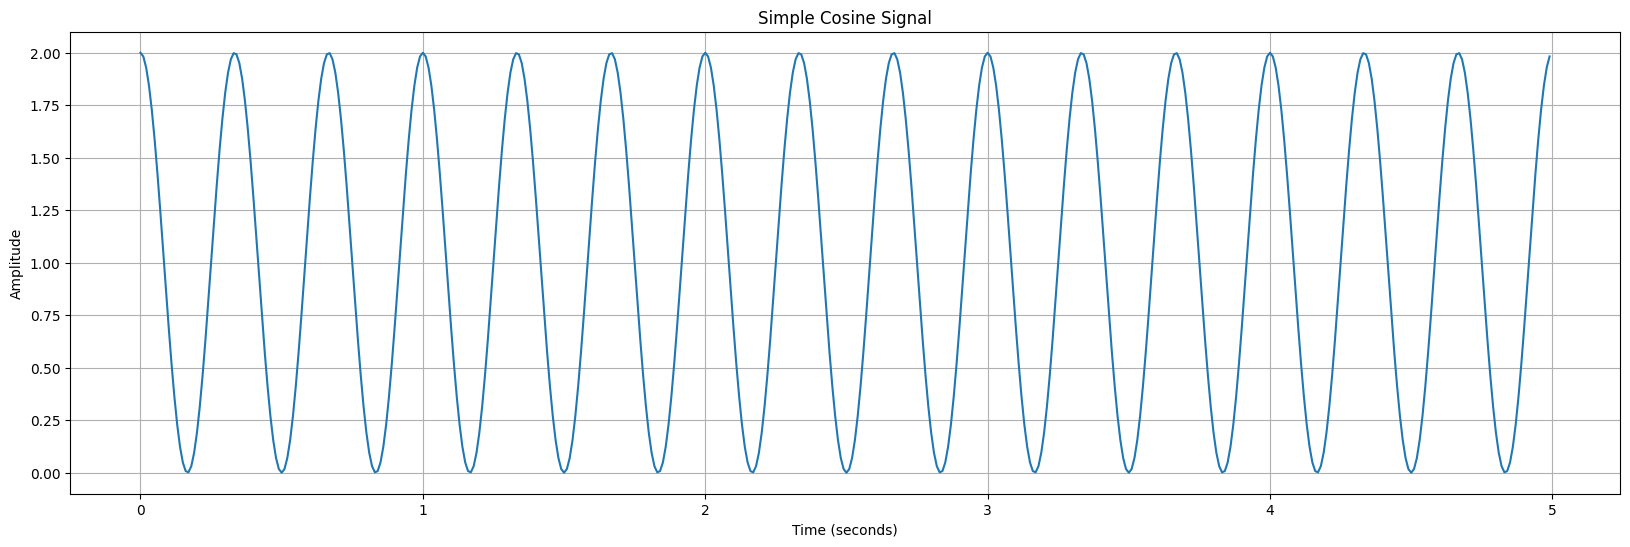

In [5]:
# Plot the time-domain signal
plt.figure(figsize=(20, 6))
plt.plot(t, signal)
plt.title("Simple Cosine Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

## Fourier Analysis
The below fourier analysis is coded based on mathematical principle in order to further understand the fourier analysis.

The fourier analysis for a given frequency $f$ can be written as:

$$
\frac{1}{t_2 - t_1} \int_{t_1}^{t_2} g(t) \cdot e^{-2 \pi i f t} dt
$$

where $g(t)$ is the signal

### Wrap the Signal Around a Point to Visualize Resulting Graph

Specify the frequency of wrapping and visualize the corresponding wrapped graph on the real-imaginary axis. 

To wrap the signal, use Eulers equation to convert the signal into the real-imaginary axis:

$$
g(t) \cdot e^{-2 \pi i f t}
$$

For a $f=3$ value, the graph will show the below pattern (imagine average weight is far right)

![image.png](resources/point_wrapped_signal.png)

**Note** that `f = 1 / duration` will result in the signal being wrapped around the graph within a single revolution. 

In [6]:
f = 3

In [7]:
point_wrapped_signal = signal * np.exp(-2 * np.pi * 1j * f * t)

# Extract real and imaginary parts for plotting
x = np.real(point_wrapped_signal)  # X-coordinates
y = np.imag(point_wrapped_signal)  # Y-coordinates

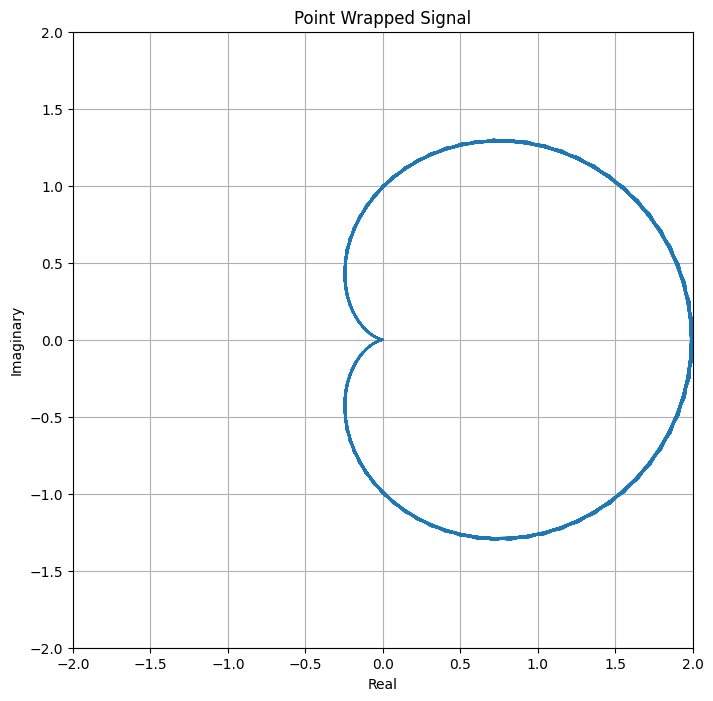

In [8]:
# Assuming `x` and `y` are your data arrays
plt.figure(figsize=(8, 8))
plt.plot(x, y)  # Plot your data
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Point Wrapped Signal')
plt.grid(True)

# Get the maximum range for symmetric axes
x_range = max(abs(min(x)), max(x))
y_range = max(abs(min(y)), max(y))
max_range = max(x_range, y_range)

# Set limits symmetrically around zero
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)

# Show the plot
plt.show()

- Is there any further mathematical meaning behind the shapes once wound at a certain frequency?

### Calculate 'Center of Mass' of the Shape

The idea of the 'center of mass' can be calculated using the below equation:

$$
\frac{1}{t_2 - t_1} \int_{t_1}^{t_2} f(g) \cdot e^{-2 \pi i f t}
$$

**Note,** that integration of the above signal requires numerical integration. To complete this, scipy's quad numerical integration method to calculate the integral.

For a $f=3$, the 'center of mass'. Here you can see the center of mass moves further away from zero. Trying other frequencies, the center of mass will stay approximately around origin
can be plotted as: 

![Point wrapped with center](resources/point_wrapped_with_center.png)

In [9]:
def wrap_signal(t, f, harmonic_function):
    signal = harmonic_function(t)
    wrapped_signal = signal * np.exp(-2 * np.pi * 1j * f * t)
    return wrapped_signal
    

In [10]:
t1 = 0
t2 = duration
f = 3

assert f >= 0

real_int = quad(lambda t: np.real(wrap_signal(t, f, simple_haromic_signal)), t1, t2)[0]
imag_int = quad(lambda t: np.imag(wrap_signal(t, f, simple_haromic_signal)), t1, t2)[0]

integral = (1/ (t2 - t1)) * (real_int + 1j * imag_int)


In [11]:
wrapped_signal = wrap_signal(t, f, simple_haromic_signal)

# Extract real and imaginary parts for plotting
x = np.real(wrapped_signal)  # X-coordinates
y = np.imag(wrapped_signal)  # Y-coordinates

# Extract integral real and imaginary
int_x = np.real(integral)
int_y = np.imag(integral)

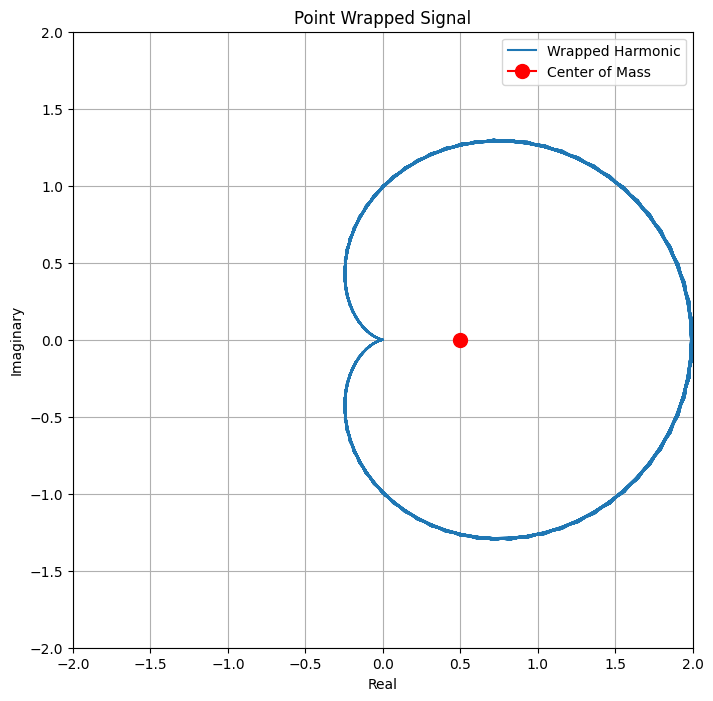

In [12]:
# Assuming `x` and `y` are your data arrays
plt.figure(figsize=(8, 8))
plt.plot(x, y, label="Wrapped Harmonic")  # Plot your data
plt.plot(int_x, int_y, label="Center of Mass", color='red', markersize=10, marker='o')  # Plot your data
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.title('Point Wrapped Signal')
plt.grid(True)

# Get the maximum range for symmetric axes
x_range = max(abs(min(x)), max(x))
y_range = max(abs(min(y)), max(y))
max_range = max(x_range, y_range)

# Set limits symmetrically around zero
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)


# Show the plot
plt.show()

### Visualize the Center of Mass over a set of frequencies. 

The x-axis will be frequency, with the y-axis being the magnitude of the 'center of mass' complex number. 

In [13]:
t1 = 0
t2 = duration

In [14]:
step = 0.02
f_range = np.arange(0.0, duration + step, step)
center_magnitudes = []

for f in f_range:
    assert f >= 0

    real_int = quad(lambda t: np.real(wrap_signal(t, f, simple_haromic_signal)), t1, t2)[0]
    imag_int = quad(lambda t: np.imag(wrap_signal(t, f, simple_haromic_signal)), t1, t2)[0]

    integral = (1/ (t2 - t1)) * (real_int + 1j * imag_int)
    magnitude = abs(integral)

    center_magnitudes.append(magnitude)


In [15]:
center_magnitudes

[0.9999999999999997,
 0.9835879241784891,
 0.9353229450112943,
 0.8580501964596566,
 0.7562881577609981,
 0.6359116302403649,
 0.5037425768623176,
 0.36708009455386753,
 0.23320518649624944,
 0.10889753058268234,
 7.836392736960496e-16,
 0.08893757179722821,
 0.15491059798647114,
 0.19659170922119906,
 0.2143359976018098,
 0.21006308987213168,
 0.18702915515814156,
 0.14951023076610462,
 0.10242460231957176,
 0.05092592001985518,
 7.601874578494579e-16,
 0.04590319221865646,
 0.08317486149964042,
 0.10926860622353937,
 0.1228238232304076,
 0.12368612720284432,
 0.11282830234387412,
 0.09218338387484344,
 0.06440827595276609,
 0.03260131337567971,
 1.7810972476078458e-15,
 0.030314361422972575,
 0.05568025596027331,
 0.0740667566598836,
 0.08421607944813052,
 0.08570909139479631,
 0.07895211864521508,
 0.06509039285747208,
 0.045859702031831935,
 0.0233927511285625,
 2.1905090968670681e-16,
 0.022053895872943707,
 0.040757510958714535,
 0.054525829092564385,
 0.06232501768809637,
 0.063

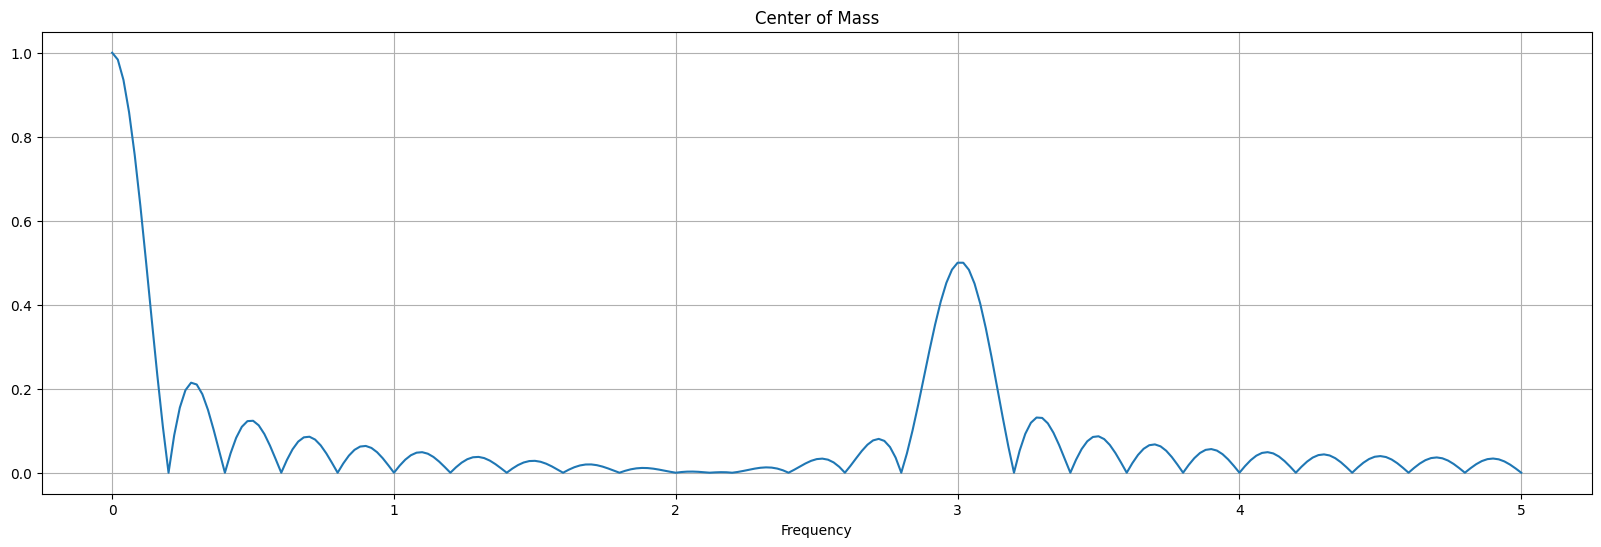

In [16]:
# Plot the time-domain signal
plt.figure(figsize=(20, 6))
plt.plot(f_range, center_magnitudes)
plt.title("Center of Mass")
plt.xlabel("Frequency")
plt.grid(True)
plt.show()

The value of $1$ at $f=0$ is a result of the original signal being offset by $1$

### Apply to more complex signal

Additionally, remove the division of $\frac{1}{t_2 - t_1}$ to understand how the strenght of a frequency effects the above

In [17]:
# Parameters
fs = 100  # Sampling frequency (samples per second)
duration = 10 # 10 second duration
t = np.linspace(0, duration, int(fs * duration), endpoint=False)  # Time vector

In [18]:
wave_count = 3
frequencies = [3, 5, 3.5]  # Specify frequency (per second)
amplitudes = [1, 0.5, 1]  # Specify harmonic amplitude
phases = [np.pi/2, 0, np.pi/2]  # Phase is at pi/2 (90 degrees)


# Add each sinusoidal component to the signal
def complex_haromic_signal(t):
    signal = np.zeros_like(t)
    for i in range(wave_count):
        signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i])
    return signal

def complex_components_signal(t):
    components = []
    for i in range(wave_count):
        signal = np.zeros_like(t)
        signal += amplitudes[i] * np.sin(2 * np.pi * frequencies[i] * t + phases[i])
        components.append(signal)
    return components


In [19]:
complex_signal = complex_haromic_signal(t)
complex_components = complex_components_signal(t)

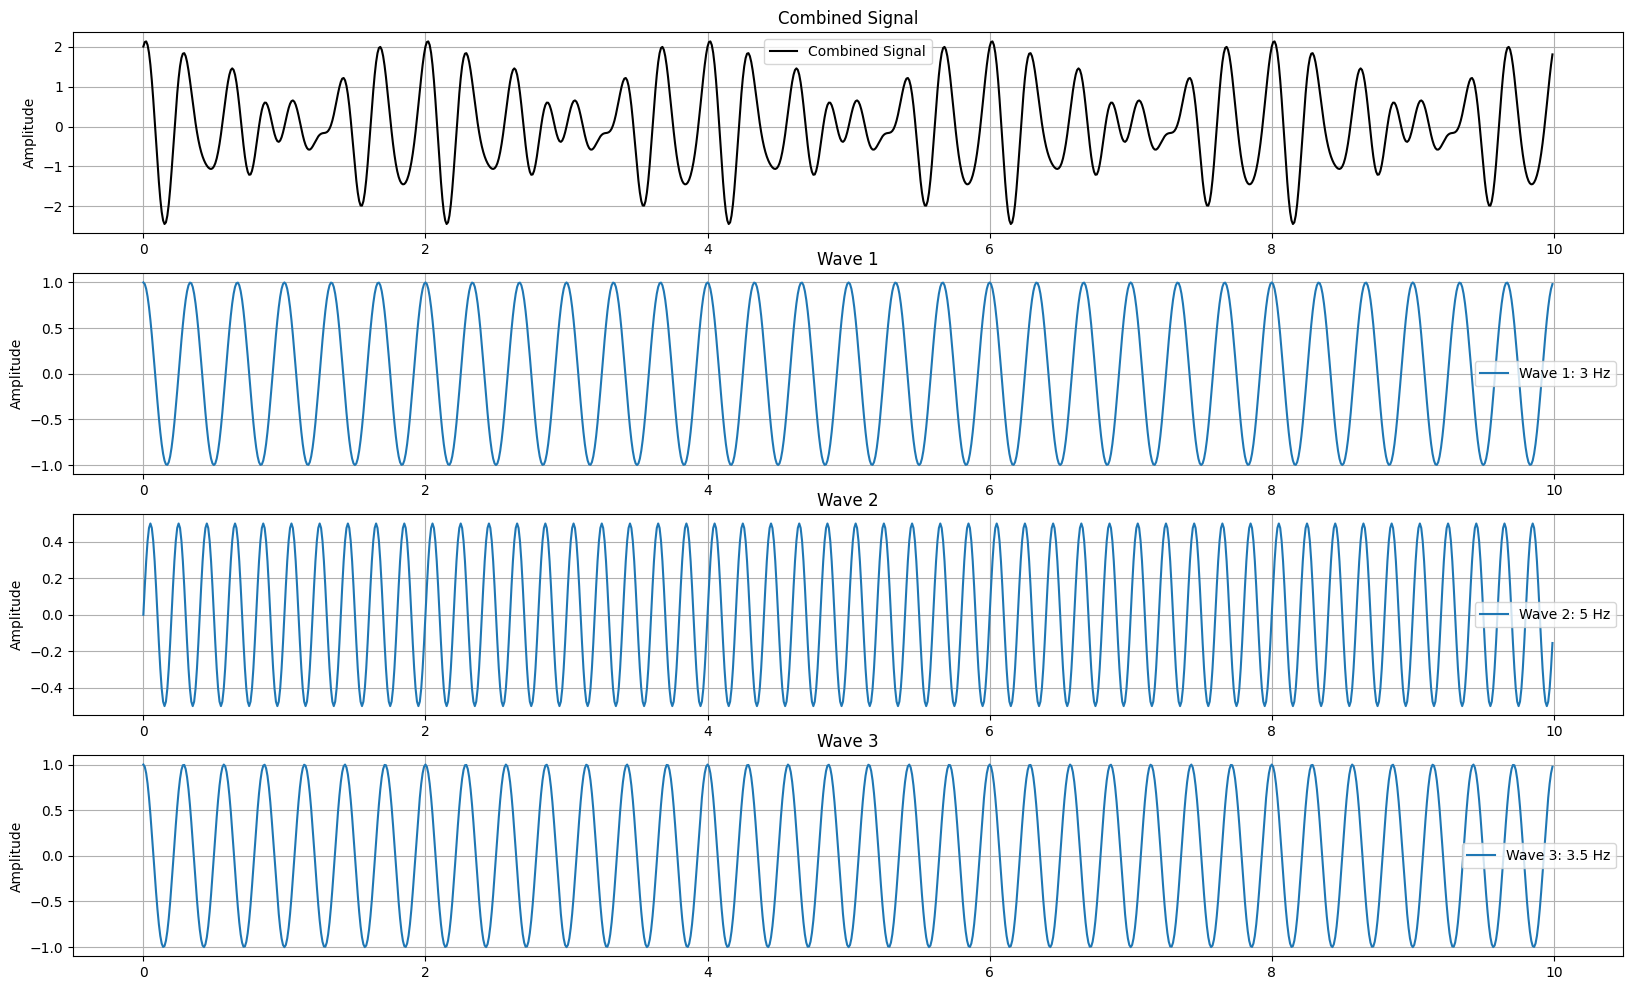

In [20]:
fig, axes = plt.subplots(wave_count + 1, 1, figsize=(20, 12), sharex=False)

axes[0].plot(t, complex_signal, color='black', label="Combined Signal")
axes[0].set_title("Combined Signal")
axes[0].set_ylabel("Amplitude")
axes[0].grid(True)
axes[0].legend()

for i in range(wave_count):
    axes[i + 1].plot(t, complex_components[i], label=f"Wave {i+1}: {frequencies[i]} Hz")
    axes[i + 1].set_title(f"Wave {i+1}")
    axes[i + 1].set_ylabel("Amplitude")
    axes[i + 1].grid(True)
    axes[i + 1].legend()


Wrap the signal as an example of a more complex wave being wrapped.

Note that I have used $\frac{2}{T} scaling here. This is the correct scaling. Previously 1/T was used, however I believe this was provided to help solidify the concept when learning, even if it doesn't represent the full story.

In [21]:
f = 5
complex_wrapped_signal = wrap_signal(t, f, complex_haromic_signal)  # Create point wrapped complex signal

t1 = 0  # Specify integral limits
t2 = duration

assert f >= 0  # Assert frequency is positive

real_int = quad(lambda t: np.real(wrap_signal(t, f, complex_haromic_signal)), t1, t2, limit=100)[0]
imag_int = quad(lambda t: np.imag(wrap_signal(t, f, complex_haromic_signal)), t1, t2, limit=100)[0]

integral = (2/ (t2 - t1)) * (real_int + 1j * imag_int)    

In [22]:
# Extract real and imaginary parts for plotting
x = np.real(complex_wrapped_signal)  # X-coordinates
y = np.imag(complex_wrapped_signal)  # Y-coordinates

# Extract integral real and imaginary
int_x = np.real(integral)
int_y = np.imag(integral)

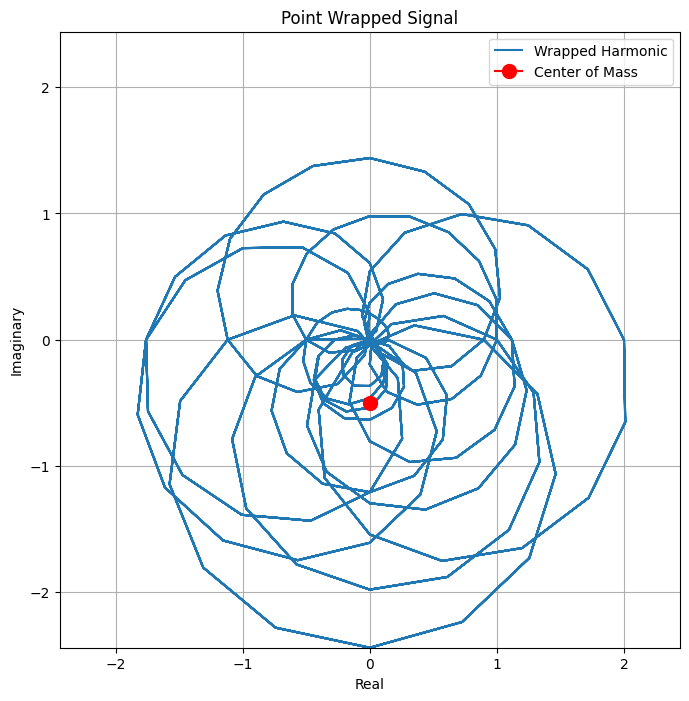

In [23]:
# Assuming `x` and `y` are your data arrays
plt.figure(figsize=(8, 8))
plt.plot(x, y, label="Wrapped Harmonic")  # Plot your data
plt.plot(int_x, int_y, label="Center of Mass", color='red', markersize=10, marker='o')  # Plot your data
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.legend()
plt.title('Point Wrapped Signal')
plt.grid(True)

# Get the maximum range for symmetric axes
x_range = max(abs(min(x)), max(x))
y_range = max(abs(min(y)), max(y))
max_range = max(x_range, y_range)

# Set limits symmetrically around zero
plt.xlim(-max_range, max_range)
plt.ylim(-max_range, max_range)


# Show the plot
plt.show()

Calculate the power spectrum, removing the division of the integral to understand the greater impact of each frequency.

In [24]:
step = 0.01
f_range = np.arange(0.0, duration + step, step)
center_magnitudes = []

for f in f_range:
    assert f >= 0

    real_int = quad(lambda t: np.real(wrap_signal(t, f, complex_haromic_signal)), t1, t2, limit=100)[0]
    imag_int = quad(lambda t: np.imag(wrap_signal(t, f, complex_haromic_signal)), t1, t2, limit=100)[0]

    power = (2/ (t2 - t1)) * (real_int**2 + (imag_int)**2)    

    center_magnitudes.append(power)


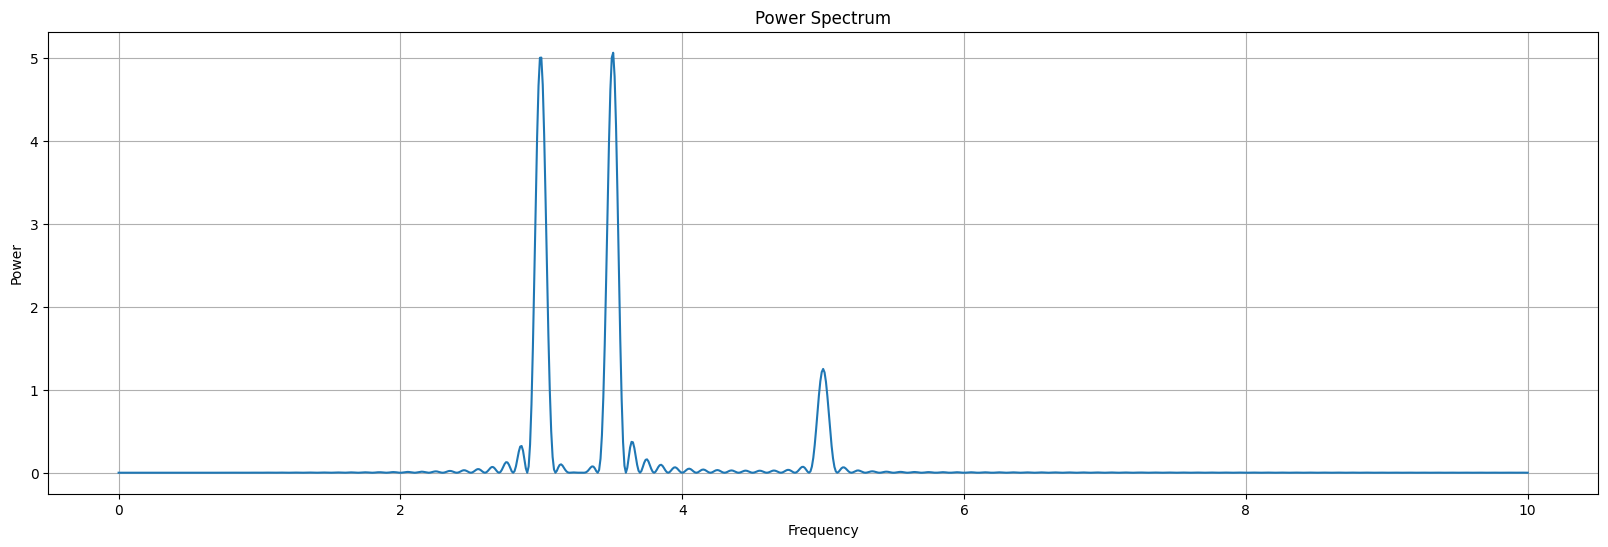

In [25]:
# Plot the time-domain signal
plt.figure(figsize=(20, 6))
plt.plot(f_range, center_magnitudes)
plt.title("Power Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.grid(True)
plt.show()

### Creating the Fourier Series

As we are using sampled data, we can utilize the Discrete Fourier Transform. 

In [ ]:
# Parameters
fs = 100  # Sampling frequency (samples per second)
duration = 10 # 10 second duration
t = np.linspace(0, duration, int(fs * duration + 1/duration), endpoint=False)  # Time vector
f_range = np.arange(0.0, duration, 1/duration)

t1 = 0  # Specify integral limits
t2 = duration



a_coefficients = []
b_coefficients = []
power = []

for f in f_range:
    complex_wrapped_signal = wrap_signal(t, f, complex_haromic_signal)  # Create point wrapped complex signal

    assert f >= 0  # Assert frequency is positive

    real_int = quad(lambda t: np.real(wrap_signal(t, f, complex_haromic_signal)), t1, t2, limit=200)[0]
    imag_int = quad(lambda t: np.imag(wrap_signal(t, f, complex_haromic_signal)), t1, t2, limit=200)[0]

    # Equivalent of 2/T * (A + B)
    integral = (2/ (t2 - t1)) * (real_int + 1j * imag_int)   
    power = (2/ (t2 - t1)) * (real_int**2 + imag_int**2)   

    a_coefficients.append(np.real(integral))
    b_coefficients.append(np.imag(integral))

In [31]:
replicated_signal = np.zeros_like(t)  # Duplicate length of signal
amplitudes = []
phases = []


for a, b, f in zip(a_coefficients, b_coefficients, f_range):
    magnitude = np.sqrt(a**2 + b**2)
    phase = np.arctan2(b, a)  # Compute the phase using atan2

    replicated_signal += magnitude * np.cos(2 * np.pi * f * t + phase)

    amplitudes.append(magnitude)
    phases.append(phase)

In [34]:
amplitudes

[np.float64(5.592748486549227e-16),
 np.float64(1.131680627455792e-15),
 np.float64(1.0447349918928714e-15),
 np.float64(1.915361977910681e-15),
 np.float64(1.7695084209174465e-15),
 np.float64(2.359674606258287e-15),
 np.float64(1.7572889661037051e-15),
 np.float64(1.3371636091819542e-15),
 np.float64(1.0713795997940192e-16),
 np.float64(1.0873503576454807e-15),
 np.float64(5.844921583606831e-16),
 np.float64(1.7559191504305192e-15),
 np.float64(1.7666436143688626e-15),
 np.float64(1.5694053929045701e-15),
 np.float64(2.1935494326825653e-16),
 np.float64(8.080686802895073e-16),
 np.float64(6.642591210580685e-16),
 np.float64(9.559935008002029e-16),
 np.float64(7.791361360319882e-16),
 np.float64(1.693218079121366e-16),
 np.float64(9.012146074645206e-16),
 np.float64(1.9157862592938123e-15),
 np.float64(2.0066326209696303e-15),
 np.float64(2.7452002158632076e-15),
 np.float64(1.1227825062130235e-15),
 np.float64(1.0906383440672745e-15),
 np.float64(1.5692742334443446e-15),
 np.float64(

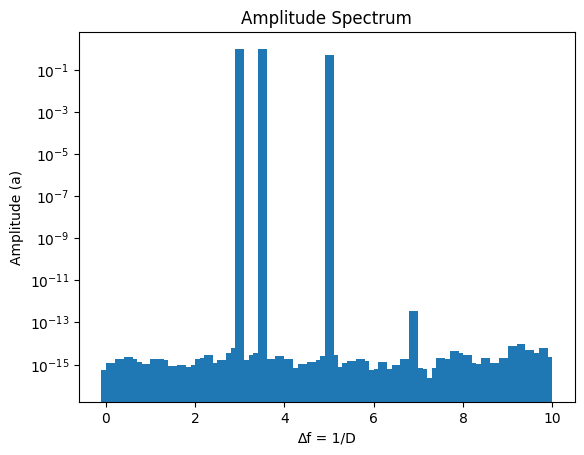

In [44]:
plt.bar(x=f_range, height=amplitudes, width=0.2)
plt.yscale('log')
plt.title('Amplitude Spectrum')
plt.xlabel('∆f = 1/D')
plt.ylabel('Amplitude (a)')
plt.show()

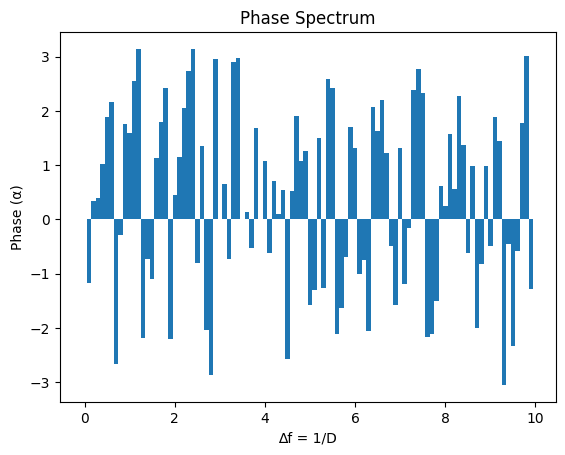

In [42]:
plt.bar(x=f_range, height=phases, width=0.1)
plt.title('Phase Spectrum')
plt.xlabel('∆f = 1/D')
plt.ylabel('Phase (α)')
plt.show()

In [28]:
complex_signal = complex_haromic_signal(t)

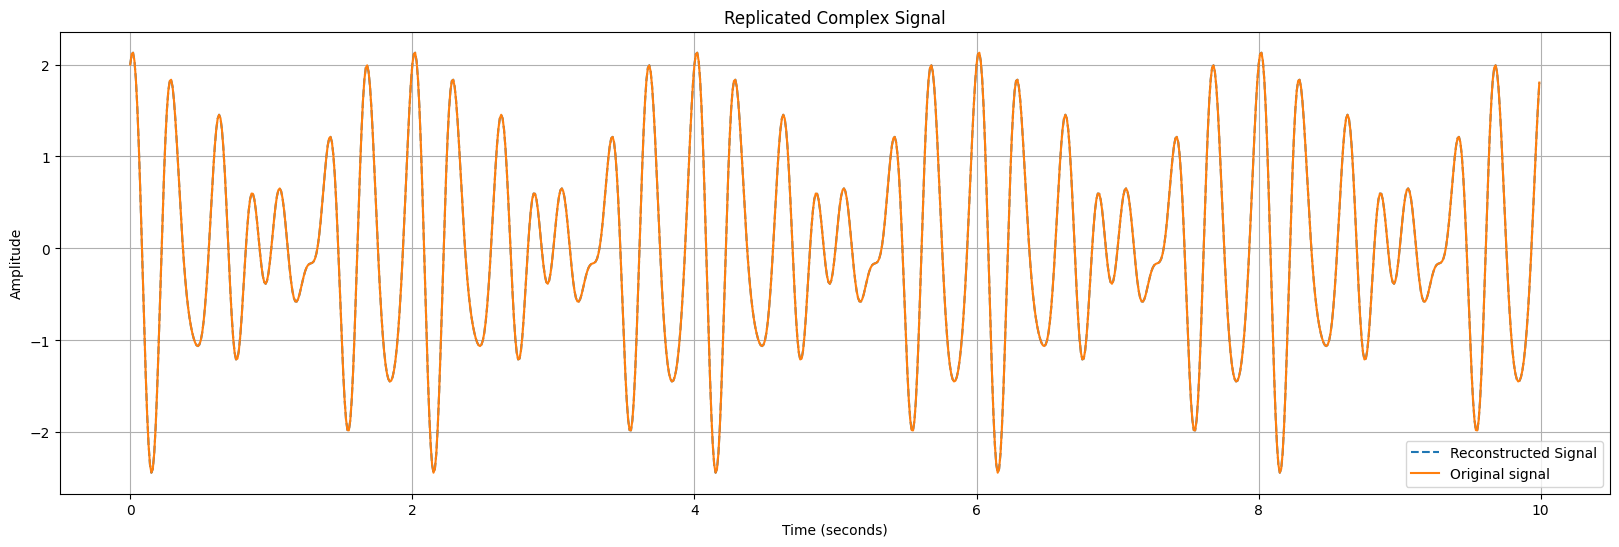

In [29]:
# Plot the time-domain signal
plt.figure(figsize=(20, 6))
plt.plot(t, replicated_signal, '--', label='Reconstructed Signal')
plt.plot(t, complex_signal, label='Original signal')
plt.title("Replicated Complex Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

In [30]:
original_energy = np.sum(complex_signal**2)
reconstructed_energy = np.sum(replicated_signal**2)
print(f"Original Energy: {original_energy}, Reconstructed Energy: {reconstructed_energy}")


Original Energy: 1125.0, Reconstructed Energy: 1124.9999999999968


Reconstruction maintains conservation of energy.